In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

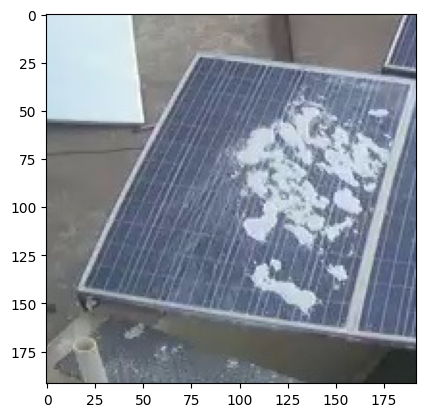

In [2]:
#original=cv.imread("clean2.jpg")
original=cv.imread("dirty4.jpg")
#openCV reads image as BGR, so converting to RGB:
original=cv.cvtColor(original,cv.COLOR_BGR2RGB)
plt.imshow(original)

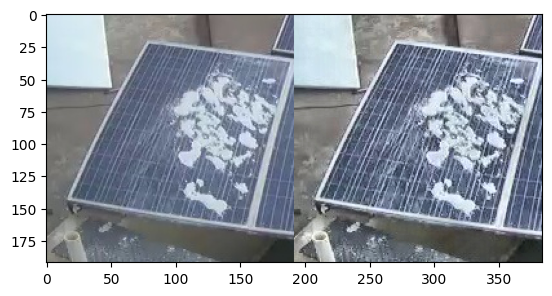

In [3]:
#getting BGR to LAB image:
img_converted=cv.cvtColor(original,cv.COLOR_BGR2LAB)
l_channel, a, b = cv.split(img_converted)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv.createCLAHE(clipLimit=2.5, tileGridSize=(10,10))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
imagestack = np.hstack((original, enhanced_img))
plt.imshow(imagestack)
plt.show()

In [4]:
print(enhanced_img.shape)

(192, 192, 3)


In [5]:
h,w=enhanced_img.shape[:2]
h,w

(192, 192)

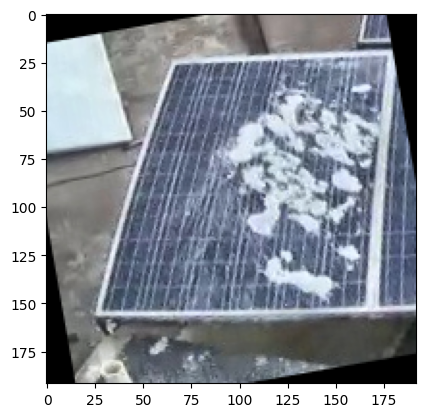

In [6]:
center = (w // 2, h // 2)

# Generating a rotation matrix
matrix = cv.getRotationMatrix2D(center, 10, 1.0)

# Performing the affine transformation
rotated = cv.warpAffine(enhanced_img, matrix, (w, h))

plt.imshow(rotated)

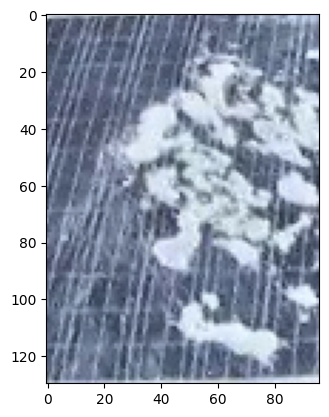

In [7]:
beforecrop=enhanced_img
#cropping
image=rotated[25 : 155, 67 : 163 ]
h,w=image.shape[:2]
enhanced=image
plt.imshow(enhanced)

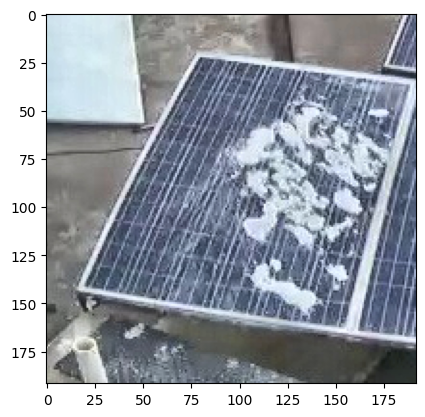

In [8]:
image=beforecrop
plt.imshow(image)

(36864, 3)
(192, 192, 3)
(36864, 1)


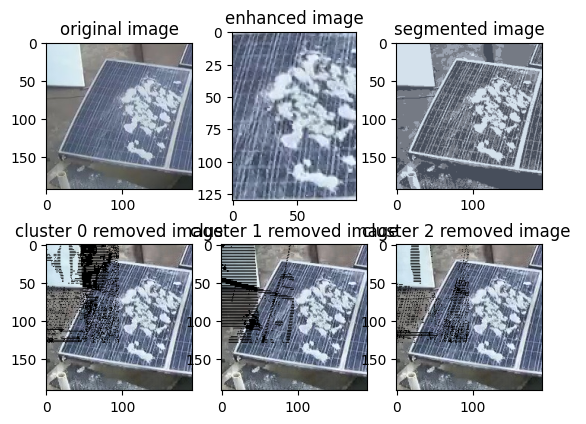

In [9]:

# reshape the image to a 2D array of pixels and 3 color values (RGB) - numpy.reshape 
#shape of an array - number of elements in each dimension of an array 

#reshape to 2d array of rgb values as k means function takes that as input    
pixel_values = image.reshape((-1, 3))

# convert to float32 format as required by the kmeans function
pixel_values = np.float32(pixel_values)


#cv.kmeans(data, K, bestLabels, criteria, attempts, flags)
#data - npfloat32 data type
#k - number of clusters
#criteria - iteration termination criteria
#attemps - flag to specify the number of times the algorithm is executed eith different centroid
#centroids chosen are specified by flags

criteria=(cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER,100,0.85)
k=4
retval,labels,centers=cv.kmeans(pixel_values,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) # convert data into 8-bit values 
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
#plt.imshow(segmented_image)

# disable only the cluster number 2 (turn the pixel into black)
masked_image0 = np.copy(image)
masked_image1 = np.copy(image)
masked_image2 = np.copy(image)
# convert to the shape of a vector of pixel values
#masked_image = masked_image.reshape((-1, 3))


# color (i.e cluster) to disable
cluster = 0
print(segmented_data.shape)
print(segmented_image.shape)
#print(segmented_data)
#print(segmented_data[12191])
print(labels.shape)
#print(labels[12191])

ctr=0
for i in range(0,h):
    for j in range(0,w):
        if labels[ctr]==0:
            masked_image0[i][j]=[0,0,0]
        elif labels[ctr]==1:
            masked_image1[i][j]=[0,0,0]
        elif labels[ctr]==2:
            masked_image2[i][j]=[0,0,0]
        ctr=ctr+1

plt.subplot(2,3,1)
plt.imshow(original)
plt.title("original image")

plt.subplot(2,3,2)
plt.imshow(enhanced)
plt.title("enhanced image")

plt.subplot(2,3,3)
plt.imshow(segmented_image)
plt.title("segmented image")

plt.subplot(2,3,4)
plt.imshow(masked_image0)
plt.title("cluster 0 removed image")


plt.subplot(2,3,5)
plt.imshow(masked_image1)
plt.title("cluster 1 removed image")

plt.subplot(2,3,6)
plt.imshow(masked_image2)
plt.title("cluster 2 removed image ")

plt.show()

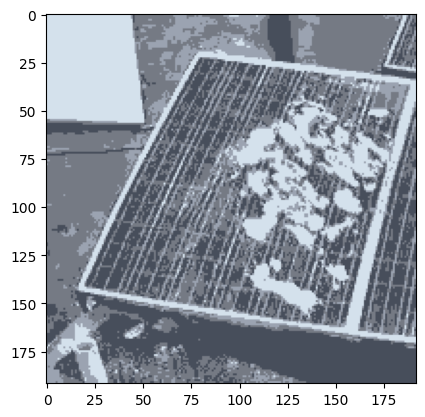

In [10]:
plt.imshow(segmented_image)

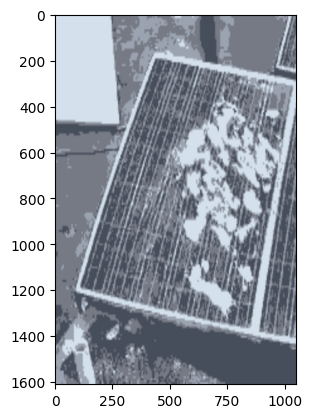

In [11]:
bigger = cv.resize(segmented_image, (1050, 1610))
plt.imshow(bigger)

Text(0.5, 1.0, 'otsu image')

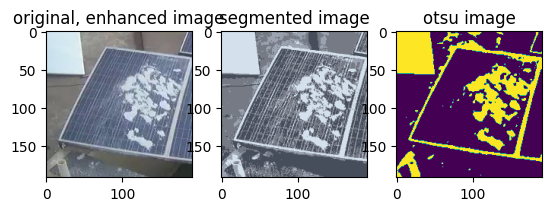

In [12]:

image1 = segmented_image
  
# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv.cvtColor(image1, cv.COLOR_RGB2GRAY)
  
img_gauss = cv.GaussianBlur(img, (5, 5), 0)


# applying Otsu thresholding
# as an extra flag in binary 
# thresholding     
ret, thresh1 = cv.threshold(img_gauss,0, 255, cv.THRESH_BINARY + 
                                            cv.THRESH_OTSU)     
  
# the window showing output image         
# with the corresponding thresholding         
# techniques applied to the input image    
#plt.imshow(thresh1)         
       
plt.subplot(1,3,1)
plt.imshow(original)
plt.title("original, enhanced image")

plt.subplot(1,3,2)
plt.imshow(segmented_image)
plt.title("segmented image")


plt.subplot(1,3,3)
plt.imshow(thresh1)
plt.title("otsu image")

Text(0.5, 1.0, 'vertical edges')

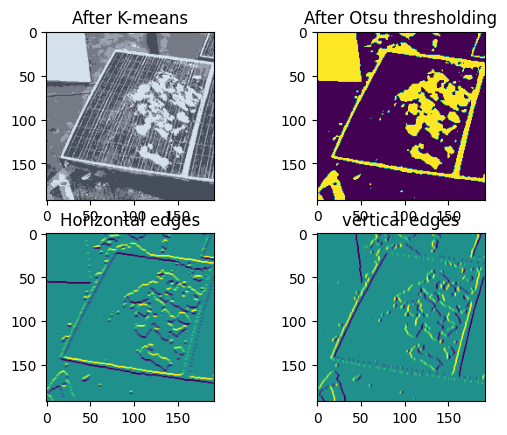

In [13]:

from skimage.filters import prewitt_h,prewitt_v

edges_prewitt_horizontal=prewitt_h(thresh1)
edges_prewitt_vertical=prewitt_v(thresh1)

#og image
#enhanced
#k means
#otsu
#edges

plt.subplot(2,2,1)
plt.imshow(segmented_image)
plt.title("After K-means")

plt.subplot(2,2,2)
plt.imshow(thresh1)
plt.title("After Otsu thresholding")

plt.subplot(2,2,3)
plt.imshow(edges_prewitt_horizontal)
plt.title("Horizontal edges")

plt.subplot(2,2,4)
plt.imshow(edges_prewitt_vertical)
plt.title("vertical edges")

In [14]:
#this is the dataset:
df=pd.read_csv("imagesdataset.csv")
df.head()

,Image_Name,Class
0,clean0,clean
1,clean1,clean
2,clean2,clean
3,clean3,clean
4,clean4,clean


In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

my_label = LabelEncoder()
 
df[ 'Class' ]= my_label.fit_transform(df[ 'Class' ])   
print(df[ 'Class' ].unique())  
print("Data Frame after Label Encoding:\n")  
df.head() 

[0 1]
Data Frame after Label Encoding:



,Image_Name,Class
0,clean0,0
1,clean1,0
2,clean2,0
3,clean3,0
4,clean4,0


In [16]:
df.shape

(548, 2)

In [17]:
df['Class'].value_counts()

0    293
1    255
Name: Class, dtype: int64

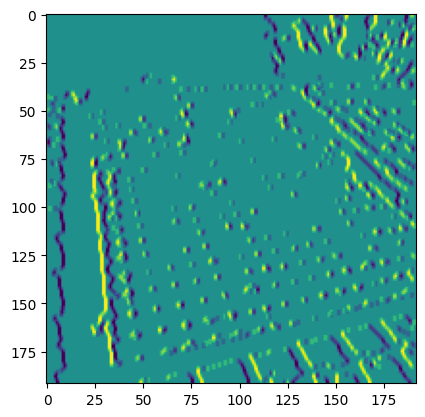

In [38]:
#now, each image needs to be processed and features are to be extracted
#so, function for that is:

def process(imagename):
    image=cv.imread(f"data/{imagename}.jpg")
    
    #resize all images to the same size:
    image=cv.resize(image,(192,192))    
    
    #openCV reads image as BGR, so converting to RGB:
    original=cv.cvtColor(image,cv.COLOR_BGR2RGB)

    #getting BGR to LAB image:
    img_converted=cv.cvtColor(original,cv.COLOR_BGR2LAB)
    l_channel, a, b = cv.split(img_converted)

    # Applying CLAHE to L-channel
    clahe = cv.createCLAHE(clipLimit=2.5, tileGridSize=(10,10))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)
    
    h,w=enhanced_img.shape[:2]
    
    center = (w // 2, h // 2)

    # Generating a rotation matrix
    matrix = cv.getRotationMatrix2D(center, 10, 1.0)

    # Performing the affine transformation
    rotated = cv.warpAffine(enhanced_img, matrix, (w, h))
    
    beforecrop=enhanced_img
    #cropping
    image=rotated[25 : 155, 67 : 163 ]
    h,w=image.shape[:2]
    enhanced=image
    
    image=beforecrop
   
    # reshape the image to a 2D array of pixels and 3 color values (RGB) - numpy.reshape 
    #shape of an array - number of elements in each dimension of an array 

    #reshape to 2d array of rgb values as k means function takes that as input    
    pixel_values = image.reshape((-1, 3))

    # convert to float32 format as required by the kmeans function
    pixel_values = np.float32(pixel_values)


    #cv.kmeans(data, K, bestLabels, criteria, attempts, flags)
    #data - npfloat32 data type
    #k - number of clusters
    #criteria - iteration termination criteria
    #attemps - flag to specify the number of times the algorithm is executed eith different centroid
    #centroids chosen are specified by flags

    criteria=(cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER,100,0.85)
    k=4
    retval,labels,centers=cv.kmeans(pixel_values,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers) # convert data into 8-bit values 
    segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
    segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
    
    
    image1 = segmented_image

    # cv2.cvtColor is applied over the
    # image input with applied parameters
    # to convert the image in grayscale
    img = cv.cvtColor(image1, cv.COLOR_RGB2GRAY)

    img_gauss = cv.GaussianBlur(img, (5, 5), 0)


    # applying Otsu thresholding
    # as an extra flag in binary 
    # thresholding     
    ret, thresh1 = cv.threshold(img_gauss,0, 255, cv.THRESH_BINARY + 
                                                cv.THRESH_OTSU)  
    
    

    edges_prewitt_horizontal=prewitt_h(thresh1)
    edges_prewitt_vertical=prewitt_v(thresh1)
    
    plt.imshow(thresh1)
    plt.imshow(edges_prewitt_horizontal)
    plt.imshow(edges_prewitt_vertical)
    
    return thresh1,edges_prewitt_horizontal,edges_prewitt_vertical
    
    
thresholded,hor,vert=process("clean251")


In [39]:
otsus=thresholded.flatten()
#thresholded.shape
otsus.shape


(36864,)

In [20]:
hor.shape

(192, 192)

In [21]:
vert.shape

(192, 192)

In [40]:
#so, upon flattening our thresholded array, we get 12480 features. let us store this in a df:

features=df.copy(deep=True)
features.head()



,Image_Name,Class
0,clean0,0
1,clean1,0
2,clean2,0
3,clean3,0
4,clean4,0


In [23]:
# Create empty columns in the DataFrame
'''
for i in range(otsus.shape[0]):
    column_name = f"Feature_{i+1}"
    features[column_name] = pd.Series(dtype=float)

features.head()
'''


'\nfor i in range(otsus.shape[0]):\n    column_name = f"Feature_{i+1}"\n    features[column_name] = pd.Series(dtype=float)\n\nfeatures.head()\n'

In [41]:

# Number of columns to add
num_columns = otsus.shape[0]

# Generate a list of empty Series with NaN values
empty_series_list = [pd.Series(dtype=float) for _ in range(num_columns)]

# Concatenate the empty Series along columns to create a new DataFrame
features = pd.concat([features] + empty_series_list, axis=1)

features.head()

,Image_Name,Class,0,1,2,3,4,5,6,7,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
0,clean0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clean1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clean2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clean3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clean4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#0th row, last column:
'''
features.iloc[0,features.shape[1]-1]

row=0
col=2
for i in otsus:
    features.iloc[row,col]=i
    col=col+1
'''    
    
    
features.head()



,Image_Name,Class,0,1,2,3,4,5,6,7,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
0,clean0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clean1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clean2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clean3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clean4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
pd.set_option('display.max_rows', 1000)

In [29]:
features['Image_Name']

0        clean0
1        clean1
2        clean2
3        clean3
4        clean4
5        clean5
6        clean6
7        clean7
8        clean8
9        clean9
10      clean10
11      clean11
12      clean12
13      clean13
14      clean14
15      clean15
16      clean16
17      clean17
18      clean18
19      clean19
20      clean20
21      clean21
22      clean22
23      clean23
24      clean24
25      clean25
26      clean26
27      clean27
28      clean28
29      clean29
30      clean30
31      clean31
32      clean32
33      clean33
34      clean34
35      clean35
36      clean36
37      clean37
38      clean38
39      clean39
40      clean40
41      clean41
42      clean42
43      clean43
44      clean44
45      clean45
46      clean46
47      clean47
48      clean48
49      clean49
50      clean50
51      clean51
52      clean52
53      clean53
54      clean54
55      clean55
56      clean56
57      clean57
58      clean58
59      clean59
60      clean60
61      clean61
62      

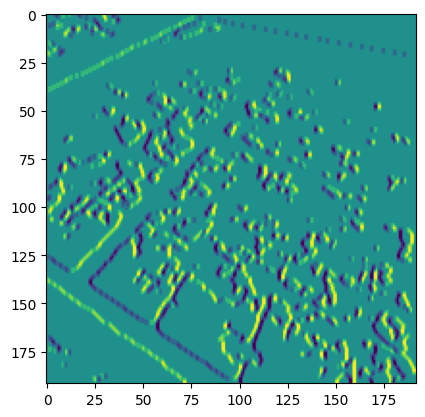

In [43]:
def addFeature(data,row,feature_array):
    col=2
    for i in feature_array:
        data.iloc[row,col]=i
        col=col+1

        
row=0
for name in df["Image_Name"]:
    #imagefile = f"{name}.jpg"
    thresholded,hor,vert=process(name)
    tflat=thresholded.flatten()
    addFeature(features,row,tflat)
    row=row+1



In [ ]:
'''
for name in df['Image_Name']:
    imagefile = f"{name}.jpg"
    print(imagefile)
''' 


In [ ]:
features.head()

In [44]:
features

,Image_Name,Class,0,1,2,3,4,5,6,7,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
0,clean0,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,clean1,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,clean2,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,clean3,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,clean4,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,clean5,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,clean6,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,clean7,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,clean8,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,clean9,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
import csv

#features.to_csv("features_data.csv")
features.to_csv("features_data_new_1.csv")


In [46]:
features.head()

,Image_Name,Class,0,1,2,3,4,5,6,7,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
0,clean0,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,clean1,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,clean2,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,clean3,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,clean4,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
x=features.iloc[:,2:features.shape[1]]
x

,0,1,2,3,4,5,6,7,8,9,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y=features.iloc[:,1]
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [49]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,36854,36855,36856,36857,36858,36859,36860,36861,36862,36863
312,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
x_train.shape

(411, 36864)

In [51]:
x_test.shape

(137, 36864)

In [52]:
y_train.shape,y_test.shape

((411,), (137,))

In [53]:

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score




In [54]:


param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

model.fit(x_train,y_train)

model

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [55]:
model.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [56]:
model.best_estimator_

SVC(C=0.1, gamma=0.0001, kernel='poly', probability=True)

In [57]:

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0]
The actual data is:
[0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0]
The model is 98.54014598540147% accurate
